# Raster Plots
Six graphs consisted of <b> 3 </b> Image_types * <b> 2 </b> sexes

## Preparations

In [1]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st

from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

## Retrive data (w/ sample sessions)

In [3]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

data_directory = '/overflow/NSCI274/projects/ecephysdata/' 
manifest_path = os.path.join(data_directory, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [4]:
session = cache.get_session_table()

In [8]:
# store labeling as pandas
listP = [0,1,2,5,6,7,10,11,12,13,14,15,16,17,18,19,22,23,25,27,29,33,38,39,44,45,47,49,50,52,53,55,58,102]
listNonP = [3,4,8,9,21,24,26,28,32,34,35,36,40,41,42,46,48,51,54,56,57,112] 
listNonA = [20,30,31,37,43,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,103,104,105,106,107,108,109,110,111,113,114,115,116,117]

# print(len(listP),len(listNonP),len(listNonA))
listFrames = listP + listNonP + listNonA
listLabels = ['predator']*34 + ['non_predator']*22 + ['non_animal'] * 62

labeldict = {'frame': listFrames, 'labels': listLabels}
labels = pd.DataFrame(labeldict).set_index('frame').sort_values('frame')

In [5]:
# Male session: 715093703
ss_male = cache.get_session_data(715093703)
# Female session: 751348571
ss_female = cache.get_session_data(751348571)

In [6]:
# Units
uid_male = ss_male.units[ss_male.units['snr'] > 4].index.values
uid_female = ss_female.units[ss_female.units['snr'] > 4].index.values

In [9]:
ns_male = ss_male.stimulus_presentations.loc[(ss_male.stimulus_presentations['stimulus_name'] == 'natural_scenes')]
ns_male_labeled = pd.merge(ns_male, labels['labels'],
                  left_on='frame',
                  right_index=True)

In [10]:
ns_female = ss_female.stimulus_presentations.loc[(ss_female.stimulus_presentations['stimulus_name'] == 'natural_scenes')]
ns_female_labeled = pd.merge(ns_female, labels['labels'],
                  left_on='frame',
                  right_index=True)

## Generate graphic

In [11]:
def steal_raster(image_type, sex):
    if sex == 'm':
        pids = drifting_gratings_presentation_ids = ns_male_labeled.loc[
            (ns_male_labeled['labels'] == image_type)
        ].index.values
        
        times = ss_male.presentationwise_spike_times(
            stimulus_presentation_ids=pids,
            unit_ids=uid_male
        )
        
        ids = times['stimulus_presentation_id'].values[0]
        plot_times = times[times['stimulus_presentation_id'] == ids]

        fig = raster_plot(plot_times, title=' ')
        
    if sex == 'f':
        pids = drifting_gratings_presentation_ids = ns_female_labeled.loc[
            (ns_female_labeled['labels'] == image_type)
        ].index.values
        
        times = ss_male.presentationwise_spike_times(
            stimulus_presentation_ids=pids,
            unit_ids=uid_male
        )
        
        ids = times['stimulus_presentation_id'].values[0]
        plot_times = times[times['stimulus_presentation_id'] == ids]
        
        fig = raster_plot(plot_times, title=' ')

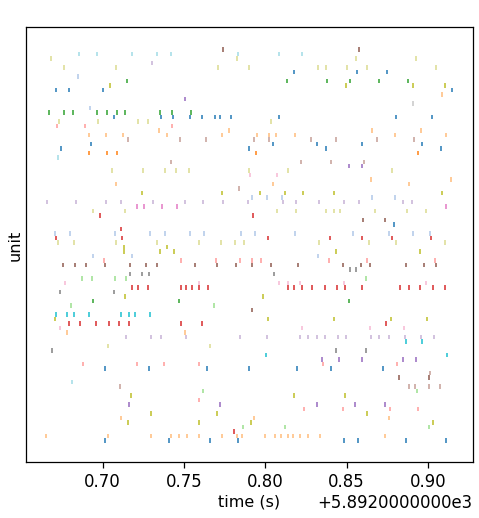

In [20]:
steal_raster('non_animal', 'm')
plt.savefig('Control_Male.png')

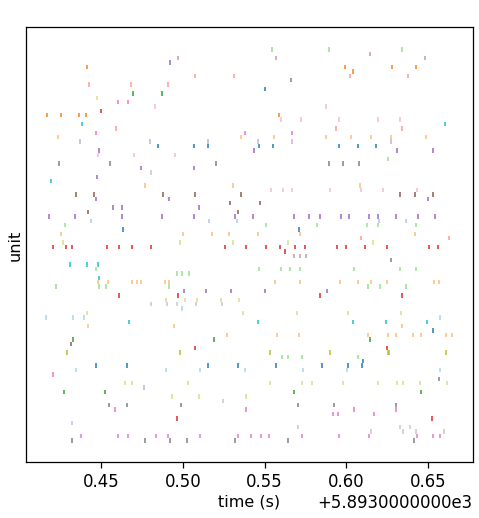

In [21]:
steal_raster('non_predator', 'm')
plt.savefig('Non_Predator_Male.png')

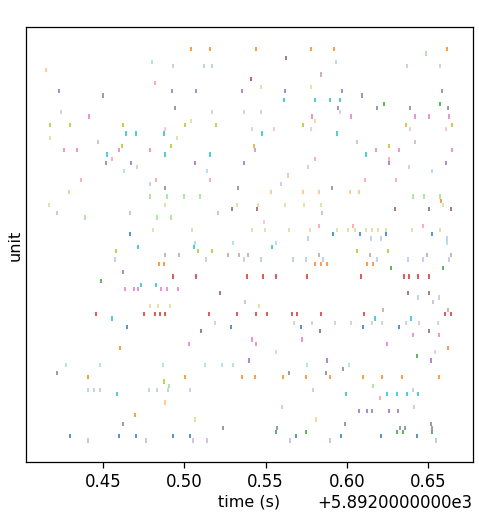

In [22]:
steal_raster('predator', 'm')
plt.savefig('Predator_Male.png')

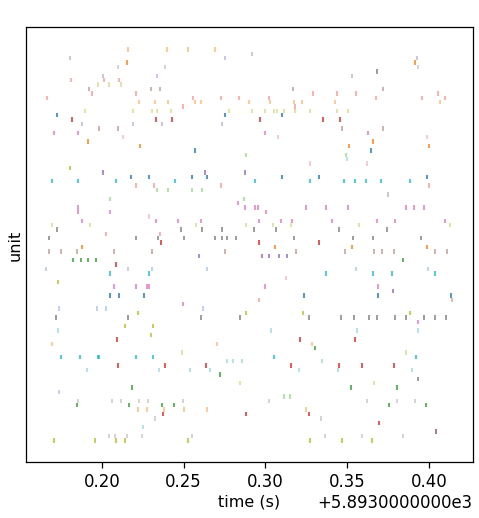

In [23]:
steal_raster('non_animal', 'f')
plt.savefig('Control_Female.png')

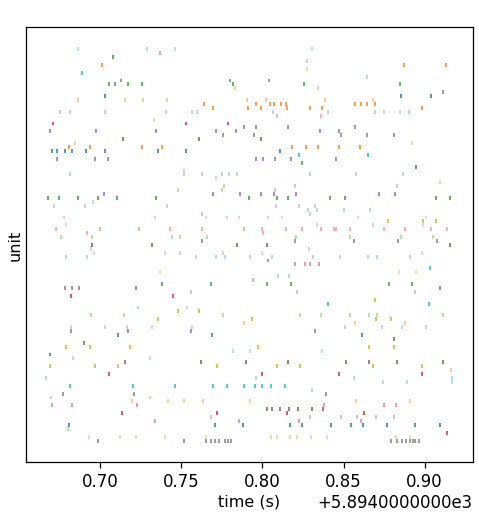

In [24]:
steal_raster('non_predator', 'f')
plt.savefig('Non_Predator_Female.png')

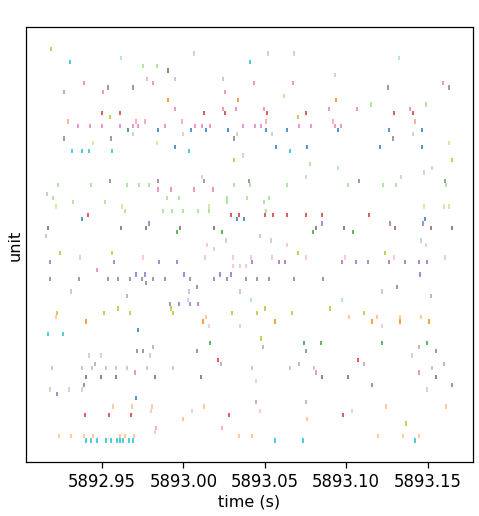

In [25]:
steal_raster('predator', 'f')
plt.savefig('Predator_Female.png')